# Diamonds Analysis

In [90]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

In [91]:
url <- "https://raw.githubusercontent.com/cpan0/project_proposal/main/diamonds.csv"
diamonds <- read_csv(url)
diamonds <- diamonds %>% 
    select(carat, cut, color, clarity, price)
head(diamonds)

Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double(),
  price = col_double()
)



carat,cut,color,clarity,price
<dbl>,<chr>,<chr>,<chr>,<dbl>
0.23,Ideal,E,SI2,326
0.21,Premium,E,SI1,326
0.23,Good,E,VS1,327
0.29,Premium,I,VS2,334
0.31,Good,J,SI2,335
0.24,Very Good,J,VVS2,336


In [92]:
diamonds_carat <- diamonds %>% 
    summarize(min_carat = min(carat),
             max_carat = max(carat))
diamonds_carat

diamonds_cut <- diamonds %>% 
    group_by(cut) %>% 
    summarize(n = n())
diamonds_cut

diamonds_clarity <- diamonds %>% 
    group_by(clarity) %>% 
    summarize(n = n())
diamonds_clarity

diamonds_color <- diamonds %>% 
    group_by(color) %>% 
    summarize(n = n())
diamonds_color

diamonds_price <- diamonds %>% 
    summarize(min_price = min(price),
             max_price = max(price))
diamonds_price

min_carat,max_carat
<dbl>,<dbl>
0.2,5.01


`summarise()` ungrouping output (override with `.groups` argument)



cut,n
<chr>,<int>
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


`summarise()` ungrouping output (override with `.groups` argument)



clarity,n
<chr>,<int>
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


`summarise()` ungrouping output (override with `.groups` argument)



color,n
<chr>,<int>
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


min_price,max_price
<dbl>,<dbl>
326,18823


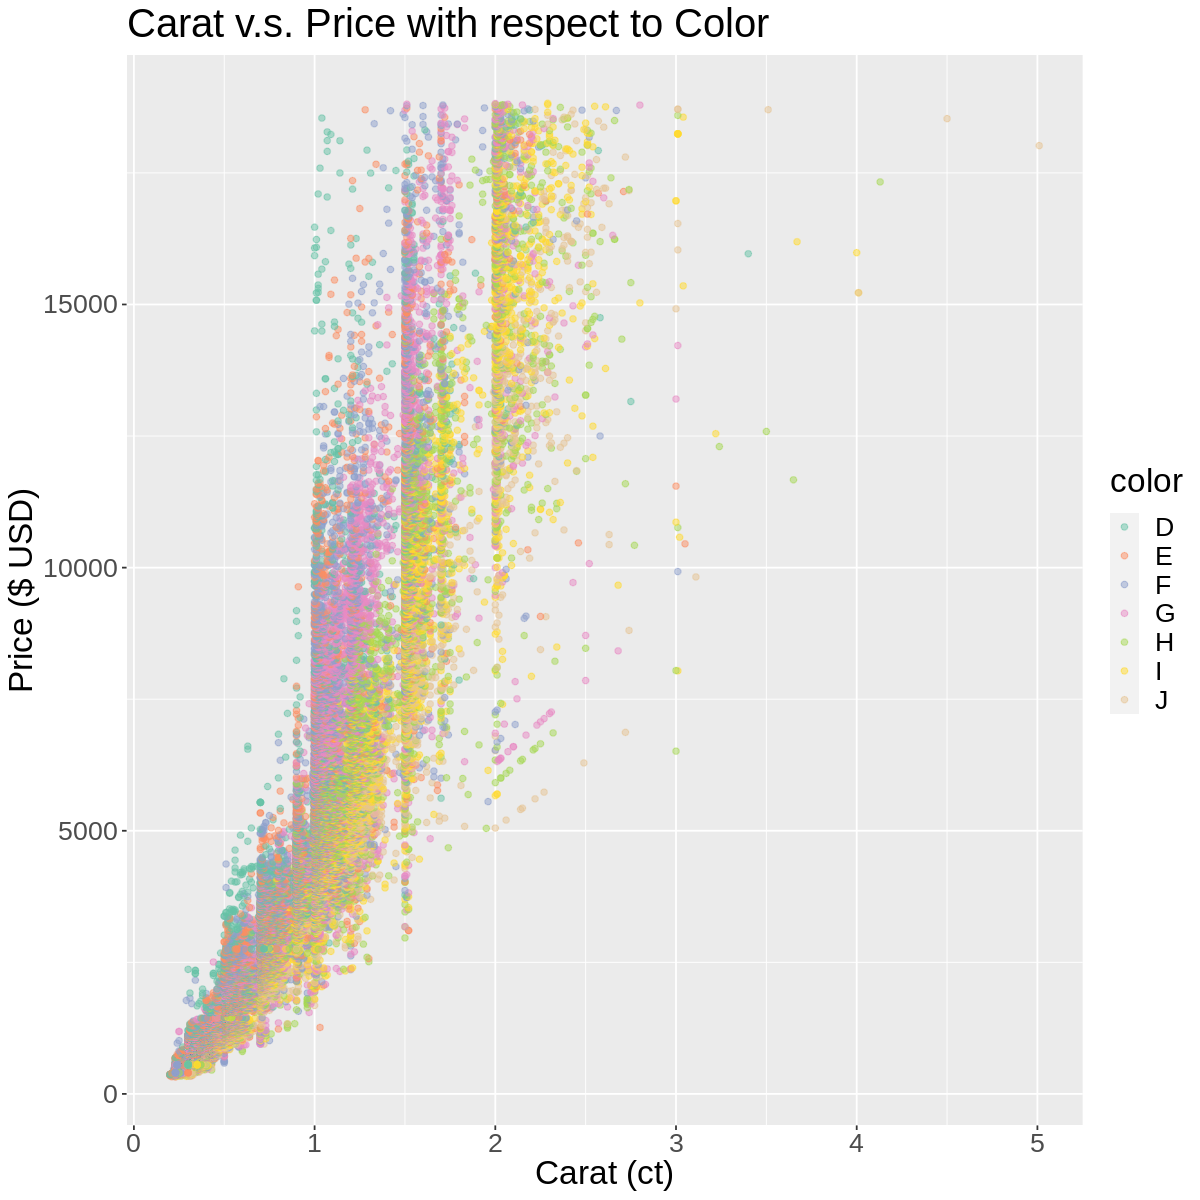

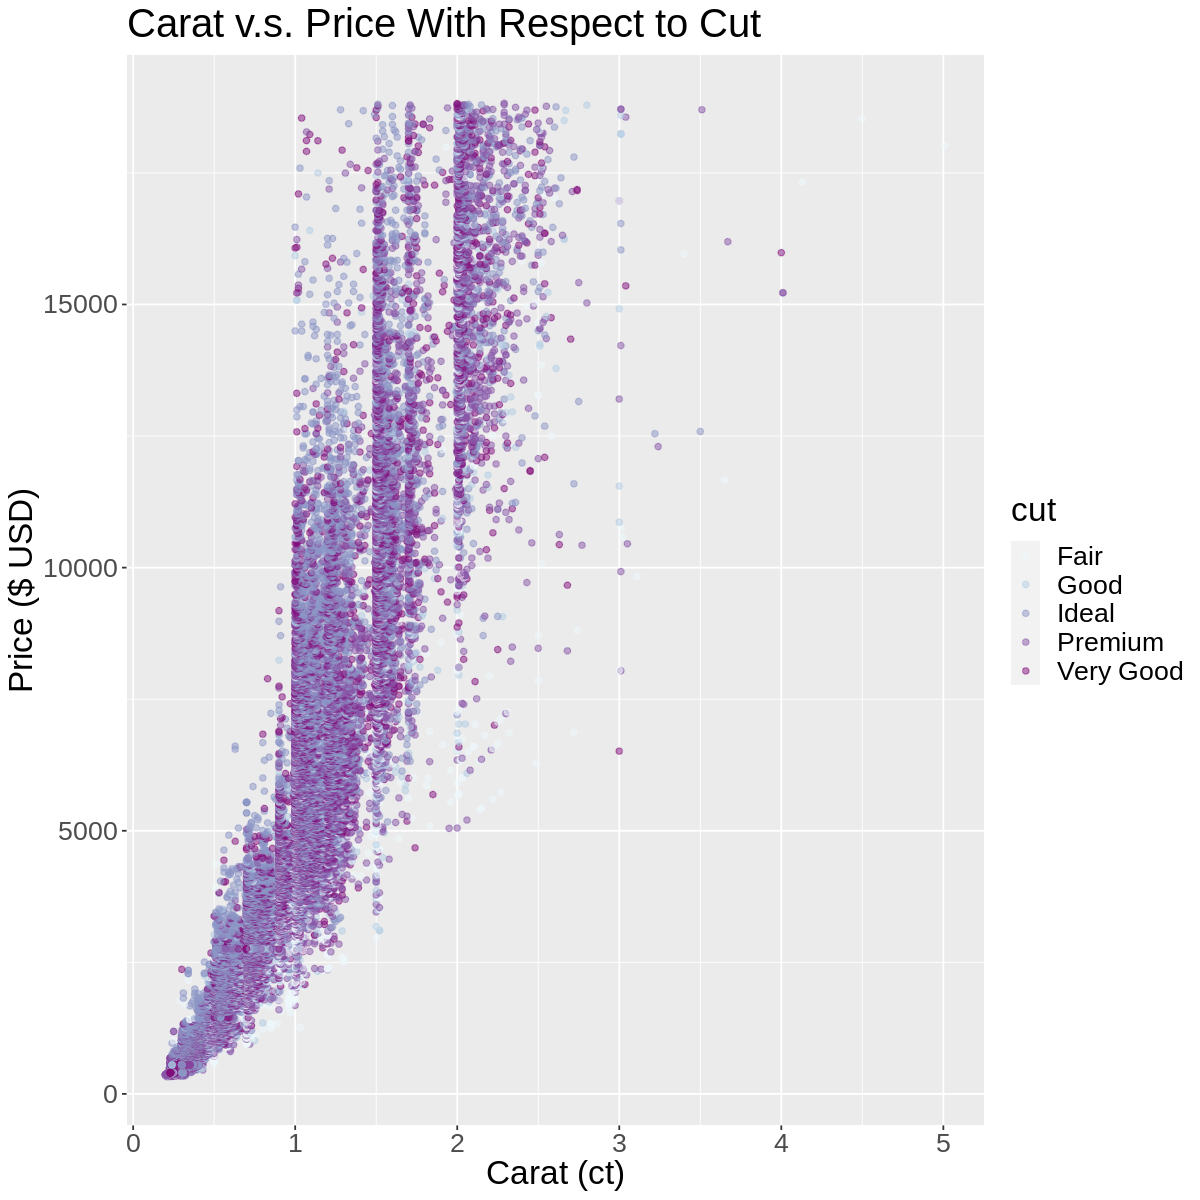

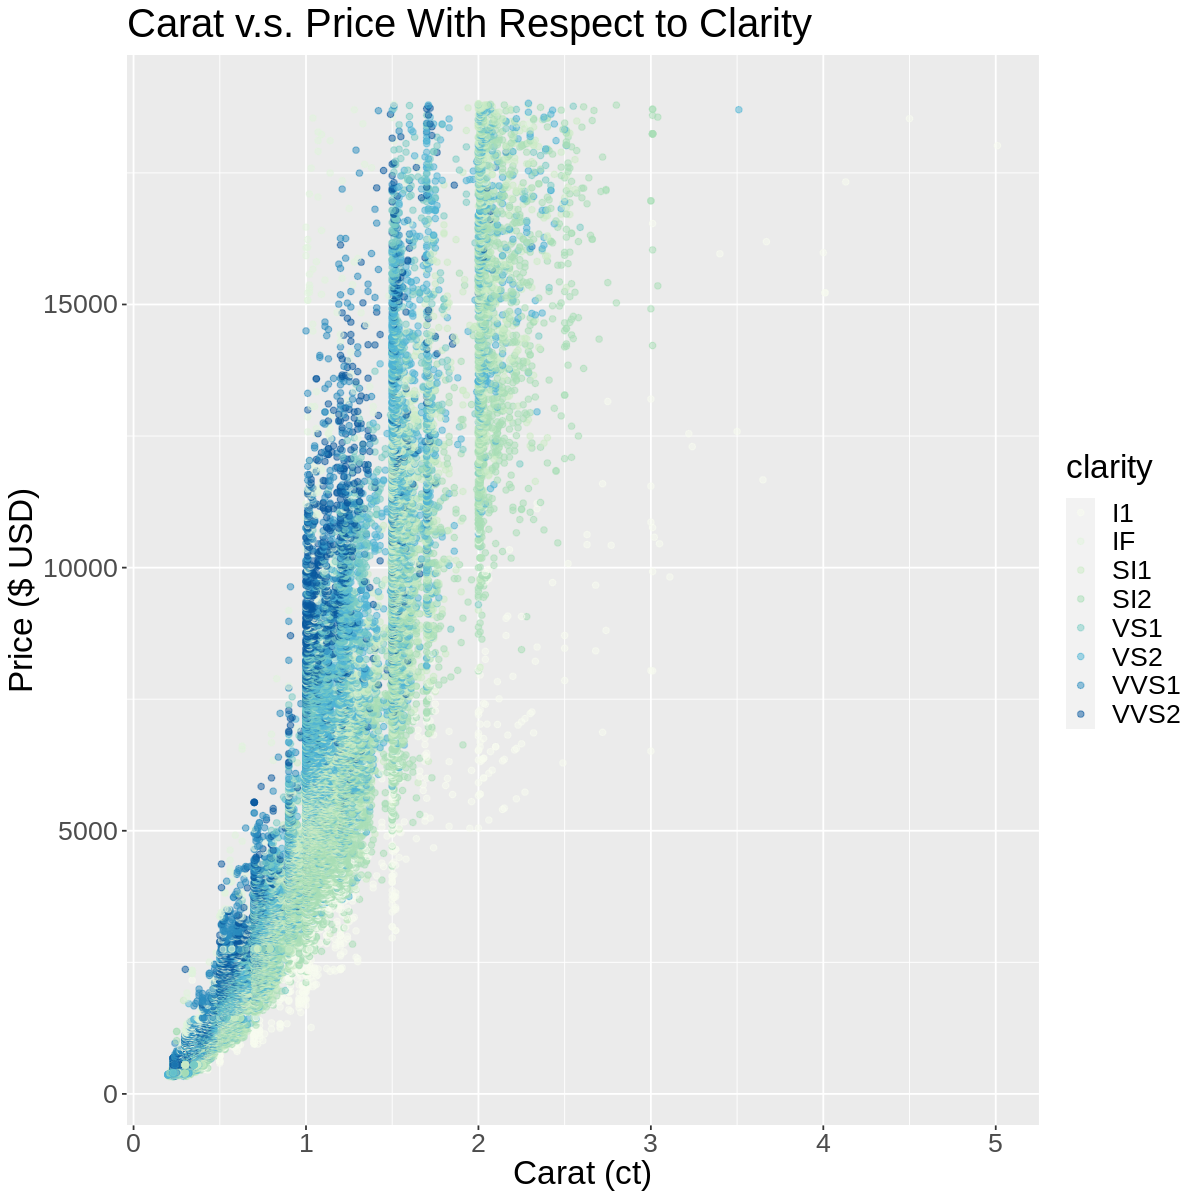

In [93]:
options(repr.plot.width = 10, repr.plot.height = 10)
diamonds_color_plot <- diamonds %>% 
    ggplot(aes(x = carat, y = price, color = color)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price with respect to Color", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2")
diamonds_color_plot

diamonds_cut_plot <- diamonds %>% 
    ggplot(aes(x = carat, y = price, color = cut)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "BuPu")
diamonds_cut_plot

diamonds_clarity_plot <- diamonds %>% 
    ggplot(aes(x = carat, y = price, color = clarity)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "GnBu")
diamonds_clarity_plot

# display.brewer.all(colorblindFriendly = T)
# display.brewer.all()